# GOPH 419 - Computational Methods for Geophysicists Lab 1 #

### Cole Narfason ##

## Abstract ##

   The purpose of this lab is to implement an algorithm for a company that designs and builds embedded control systems for automated deliveries to the International Space Station (ISS). The algorithm is to be created in order to compute the allowable range of launch angles for the first stage of a rocket system to reach a target maximum altitude within a specified tolerance. The main goal of this investigation was to compute the minimum and maximum allowable launch angles in order to reach a desired altitude. Specific variables were also kept constant in certain scenarios to mimic potential real life limitations.

In [59]:
#Show picture of example rocket
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.rmbl.ws/s8/1/w/q/L/v/wqLva.OvCc.1-small-SFI-Launch-Highlights-for-f.jpg")

## Background Theory:

This lab will make use of Python and use it to carry out examinations while using the Taylor series and aim to analyze error in numerical approximations. The Taylor series is a useful technique that allows for the estimation of the value of a function f(x) at a point xi+1 given the value of the function and its corresponding derivatives at another point xi. This series is especially useful when approximating non-elementary functions, such as trigonometric, exponential and logarithmic. Additionally it can be used for numerical differentiation and integration and error propagation. The equation for the Taylor series is given below in equation 1 and the sigma notation is given in equation 2.

**Equation 1:** Taylor Series Approximation

![alt text](Eq1.jpg "Equation 2")

**Equation 2:** Taylor Series Approximation in sigma notation

![alt text](Eq2.jpg "Equation 2")

An important aspect of this lab was to familiarize with significant figures, error analysis and the stopping criterion. The number of significant digits indicates the level of precision, how close the computed solution is to the previously computed solution. In order to gain information about precision and improve on it, the relative error is useful to calculate. The relative error is often used when the true value of a problem is not known. It provides an estimate of the error from the change in the estimated solution between successive approximations. There are two equations that relate to approximate error shown in equations 3 and 4.

**Equation 3:** Approximate Error

![alt text](Eq3.jpg "Equation 3")

**Equation 4:** Approximate Relative Error

![alt text](Eq4.jpg )

The approximate solution methods proceed until some pre-specified error tolerance is satisfied. This error tolerance is called the **stopping criterion**. The approximation keeps iterating until the condition εa< εs is no longer satisfied. In order to ensure that at least n significant figures are correct in the approximation, equation 5 is utilized. Once the stopping criterion is satisfied, the approximation is said to have converged.

**Equation 5:** Stopping Criterion Condition

![alt text](Eq5.jpg)

### For our particular goal we must use a few specific equations

We know from mechanics that for a desired maximum altitude of αR where R is the radius of the Earth:


**Equation 7:** Launch angle to reach desired maximum altitude αR

![alt text](Eq7.jpg)

Φ0 = launch angle from vertical (radians)

ve = escape velocity of the rocket

v0 = terminal velocity of the rocket

A rendition of the Taylor series will be used and the assumption is that the embedded system has functions to compute positive square roots for real positive numbers and factorials for integers, but not for trigonometric functions. Therefore, the Borwein and Chamberland formula must be used, shown in equation 8 below.

**Equation 8:** Borwein and Chamberland formula

![alt text](Eq8.jpg)

# Methods/Algorithm and Discussion of Results:

Import Necessary Libraries

In [1]:
#import all neccessary libraries for quatitative analysis and visualization

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Make a Taylor series function based off of the logic of Equations 1-5 from the background section but implements Equation 8:

In [3]:
#Taylor Series Function

def tseries(x , stopc):
    '''
    This function takes the input of an x value that can be substituted into into Eq (2) 
    and a stopc variable input which will dictate the stopping crtieria and precision/significant digits
    
    This function should output a variable T which is the approximation of a taylor series using Eq (2) user inputted
    variable x and stopc
    
    The main purpose of this function is to execute a taylor series approximation using Eq(2) on a user inputted variable x
    and stopping criteria for precision
    
    '''
    eps_a = 1.0  # initialize relative error
    y = 0  # initialize series solution 
    k = 1   #need an iteration counter k
    stopc = 0.5* (10**(-(stopc))) #make sig dig stop criterion
    
    #implement a while loop so we can get a close enough calculation based on our stopping criteria (stopc)
    while eps_a > stopc:
        #calculate the next term using equation 8
       
        dy = 0.5 * (2*x)**(2*k) / (k**2 * (np.math.factorial(2*k) / np.math.factorial(k)**2))
        
        # update the estimate of exp
        
        y = y + dy
        
        
        # update the error and iteration counter
        eps_a = abs( dy / y)
        
        #update iteration counter
        k = k + 1
        
    T = np.sqrt(y)
    #square root y to get the angle from Equation (2)
    
    return T  

Make another function called primealt that returns the min and max angles and uses the taylor series function we just created. These sample calculations below show how the min φ and max φ are calculated before being subbed into the Borwein and Chamberland formula as xmin and xmax to determine the Min and Max launch angles

## **Sample Calculation:** Minimum launch angle using the minimum φ value 

with velocity ratio = 2, α = 0.25 and tolerance = ±2% 

![alt text](C1.jpg)

## **Sample Calculation:** Maximum launch angle using the maximum φ value 

with velocity ratio = 2, α = 0.25 and tolerance = ±2% 

![alt text](C2.jpg)

In [6]:

def primealt (ve_v0, alpha, tol_alpha, stopc):
    ''' 
    This function takes the input: 
    a ratio of the escape to the terminal velocity ->  ve_v0 
    the desired max altitude as a fraction of Earth's radius -> alpha
    and the tolerance for max altitude -> tol_alpha
    stoppping criteria -> stopc
    
    The function should output:
    a two component vector containing the min allowable launch angle (when max altitude is (1*tol_alpha))
    and the max allowable launch angle when (the max altitude is (1-tol_alpha)*alpha) 
    
    This function is supposed to compute an allowable range of launch angles for the first stage of the rocket system to reach
    target max altitude with a specified tolerance while utilizing the previously defined tseries function

    
    '''
    
#get alpha MIN 
    alpha_min = ((1 + tol_alpha)* alpha)
#plug alpha min back into formula
    minx = ((1 + alpha_min )  *   (np.sqrt((1-(((alpha_min) / (((1 + alpha_min))))* ((ve_v0)**2))))))
    
    
#get alpha MAX
    alpha_max = ((1 - tol_alpha)* alpha)
    
#plug alpha_max into the formula
    maxx = ((1 + alpha_max )  *   (np.sqrt((1-(((alpha_max) / (((1 + alpha_max))))* ((ve_v0)**2))))))
    
    
    #return minang, maxang
    
    print(tseries(minx, 5), tseries(maxx, 5) )
    

## Part: B 

Test your function from (a) when ve/v0 = 2, α = 0.25 with a tolerance of ±2%. State the expected results (computed using another tool or function), the actual results from your function and whether they agree.

In [7]:
#Test my own function 'primealt' 
primealt(2, 0.25, 0.02, 5)

0.5740887346518779 0.6118594641738989


Since we used a precision of 5 significant figures:

### **Min Angle = 0.57408** ###

### **Max Angle = 0.61185** ###

## Now  let us make another function called proof that will compute the result without a taylor series approximation and see if the results agree

In [8]:
def proof (ve_v0, alpha, tol_alpha):
    ''' 
    This function takes the input: 
    a ratio of the escape to the terminal velocity ->  ve_v0 
    the desired max altitude as a fraction of Earth's radius -> alpha
    and the tolerance for max altitude -> tol_alpha
    
    The function should output:
    the min allowable launch angle (when max altitude is (1*tol_alpha))
    and the max allowable launch angle when (the max altitude is (1-tol_alpha)*alpha) 
    
    This function is supposed to compute an allowable range of launch angles for the first stage of the rocket system 
    to reach target max altitude with a specified tolerance with using the numpy arcsin function.

    
    '''
    
#get alpha MIN 
    alpha_min = ((1 + tol_alpha)* alpha)
#plug alpha min back into formula
    minang = np.arcsin ((1 + alpha_min )  *   (np.sqrt((1-(((alpha_min) / (((1 + alpha_min))))* ((ve_v0)**2))))))
    
    
#get alpha MAX
    alpha_max = ((1 - tol_alpha)* alpha)
    
#plug alpha_max into the formula
    maxang = np.arcsin ((1 + alpha_max )  *   (np.sqrt((1-(((alpha_max) / (((1 + alpha_max))))* ((ve_v0)**2))))))
    
    
    return minang, maxang
    

### Let us execute the proof function to see if its results for the max angle and minimum angle agree with the taylor series approximation

In [9]:
#Check results with another function
proof(2, 0.25, 0.02)

(0.5740889001328788, 0.6118599611945376)

# They AGREE ! We are one step closer to launching our rocket !

In [10]:
#Show picture of Elon the rocket man
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.gq.com/photos/57eac35d9228bbed3f6f4ee5/16:9/pass/elon-musk-is-a-rocket.jpg")

## Part : C

Holding ve/v0 = 2 constant, lets use the function from (a) to plot the minimum and maximum launch angles over a range of α with a tolerance of ±4%. Discuss the results. What does the launch angle approach for very small α? Approximately what is the maximum height that one can achieve for ve/v0 = 2?


Lets slightly alter our primealt function we made so that it returns a datatype we can more-easily manipulate ! 

In [11]:
def primealt2 (ve_v0, alpha, tol_alpha, stopc):
    ''' 
    This function takes the input: 
    a ratio of the escape to the terminal velocity ->  ve_v0 
    the desired max altitude as a fraction of Earth's radius -> alpha
    and the tolerance for max altitude -> tol_alpha
    
    The function should output:
    a two component vector containing the min allowable launch angle (when max altitude is (1*tol_alpha))
    and the max allowable launch angle when (the max altitude is (1-tol_alpha)*alpha) 
    
    This function is supposed to compute an allowable range of launch angles for the first stage of the rocket system to reach
    target max altitude with a specified tolerance.

    
    '''
    
#get alpha MIN 
    alpha_min = ((1 + tol_alpha)* alpha)
#plug alpha min back into formula
    minx = ((1 + alpha_min )  *   (np.sqrt((1-(((alpha_min) / (((1 + alpha_min))))* ((ve_v0)**2))))))
    
    
#get alpha MAX
    alpha_max = ((1 - tol_alpha)* alpha)
    
#plug alpha_max into the formula
    maxx = ((1 + alpha_max )  *   (np.sqrt((1-(((alpha_max) / (((1 + alpha_max))))* ((ve_v0)**2))))))
    
    
    q1 = tseries(minx, 5)
    q2 = tseries(maxx, 5)
    return [q1, q2]


Now to make it easier to visualize the data, we will put together a function called Q3 that will use our primealt2 function we just made to compute a range of Min and Max launch angles from a user-defined range of α values and put it all into a pandas dataframe

In [12]:
def Q3(a1, a2):
    '''
    This function takes the input of a lower bound and an upper bound for a user defined range of alpha values 
    where a1 = lower bound; and a2= upper bound
    
    The output of this function a dataframe called dfQ3 that contains aplha values and the corresponding Min and Max angles
    for that alpha value. This dataframe can now be used to visualize data later on
    
    The main purpose of this fuction is to produce a dataframe that illustartes over a range of alpha values what the 
    min and max angles will be so they can be visualized later on. It makes an array with 10 values total including the
    min and max alpha values and then for each of these alpha values it calculates their taylor series approximation for
    the min and max angles and populates a dataframe.
    
    '''
    #Create an empty dataframe to populate with alphas in the selected range and min and max angles
    dfQ3 = pd.DataFrame(columns=['alpha', 'Min_Angle', 'Max_Angle'])
    
    #get 10 values inbetween a1 and a2 in an array
    array = np.linspace(a1, a2, 10)
    #make a loop that uses our function from part A to populate the df with min and max angles over a range of alpha
    
    for i in range (0, 10):
        #hold the ve_v0 = 2 and the tolerance equal to plus/minus 4 % with 5 sigdigs precision
        rowi = primealt2(2, array[i], 0.04, 5)
        
        
        dfQ3 = dfQ3.append({'alpha': array[i], 'Min_Angle': rowi[0], 'Max_Angle': rowi[1]}, ignore_index=True)
        
    return dfQ3
    

Lets use the above function to scope out what angles that a range of alpha values will produce !

In [13]:
#Show limits of alpha values
new_df1 = Q3(0,0.5)
new_df1

C:\Users\Cole\Documents\Python\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Cole\Documents\Python\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


,alpha,Min_Angle,Max_Angle
0,0.000000,1.545497,1.545497
1,0.055556,1.208551,1.224489
2,0.111111,1.023074,1.050123
3,0.166667,0.848766,0.889344
4,0.222222,0.661680,0.722028
5,0.277778,0.427448,0.527439
6,0.333333,NaN,0.231854
7,0.388889,NaN,NaN
8,0.444444,NaN,NaN
9,0.500000,NaN,NaN


It seems that around an alpha value of α = 0.3 that this may be our ceiling while keeping constants in our calculation because above this alpha value we begin to encounter errors. The errors we are getting say "**invalid value encountered in the square root function**" which makes sense because in Equation 7 if the alpha value gets too high then there will end up being a negative under the square root which is not allowed. In response to this lets revise our range of alpha values that we input into function Q3 so we can better evaluate the data

In [14]:
#Show attainable df values with new alpha range of 0.01 to 0.3
new_df2 = Q3(0.01,0.32)
new_df2

,alpha,Min_Angle,Max_Angle
0,0.010000,1.424817,1.430651
1,0.044444,1.250940,1.264695
2,0.078889,1.127090,1.147567
3,0.113333,1.016080,1.043606
4,0.147778,0.908393,0.943926
5,0.182222,0.798633,0.843858
6,0.216667,0.681663,0.739541
7,0.251111,0.549865,0.626252
8,0.285556,0.385592,0.495754
9,0.320000,0.046195,0.325869


This looks way better and the best part is **No Error Message!**. Notice that the α min value is NOT equal to 0. This is because if alpha is an elevation measure then if it is equal to 0 then the rocket has not taken off or moved, it is still at the surface of the Earth. So an α min value of 0.01 is used to be more realistic.

### Now lets visualize the Min and Max angles within this alpha range can we answer the question we wanted to? 

In [15]:
#Show picture of Elon the rocket man
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.gobinge.co.za/wp-content/uploads/2020/09/Elon-Musk_-1024x700.jpg")

Make a couple of point plots to see the approximate max and min boundaries for our range of alphas

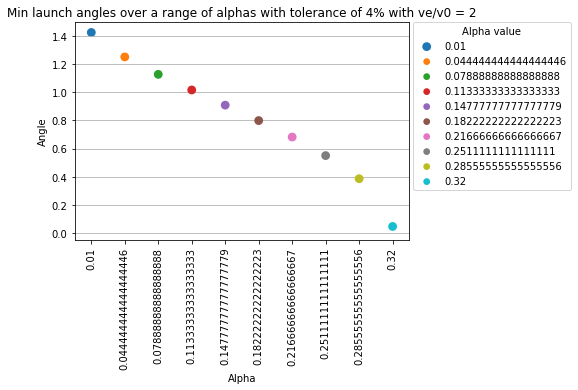

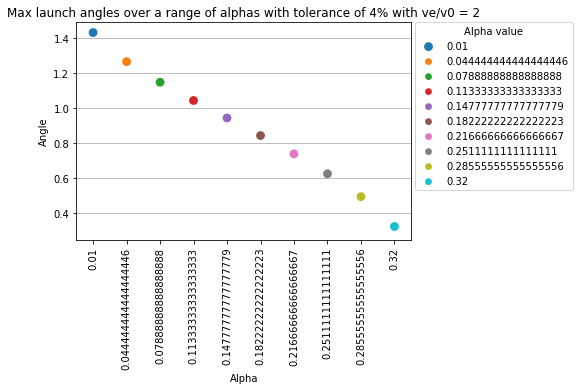

In [16]:
#make the style look better
sns.set_style({'axes.grid': True})


# make a pointplot for the Min angles over a range of alphas
b = sns.pointplot(x="alpha", y="Min_Angle", hue ="alpha" , data= new_df2)
b.set_title("Min launch angles over a range of alphas with tolerance of 4% with ve/v0 = 2")
b.set_ylabel("Angle")
b.set_xlabel("Alpha")
b.set_xticklabels( labels = new_df2["alpha"], rotation = 90)
# place the legend outside the figure/plot
plt.legend(title = 'Alpha value', bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()


# Make a pointplot for the Max angles over a range of alphas
c = sns.pointplot(x="alpha", y="Max_Angle", hue ="alpha" , data= new_df2)
c.set_title("Max launch angles over a range of alphas with tolerance of 4% with ve/v0 = 2")
c.set_ylabel("Angle")
c.set_xlabel("Alpha")
c.set_xticklabels( labels = new_df2["alpha"], rotation = 90)
# place the legend outside the figure/plot and give it a title
plt.legend(title = 'Alpha value',bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

## So what are these plots indicating to us ??

It appears that for a very small alpha (**remember altitude = alpha * Radius of the Earth**) so basically the altitude put into the radius of Earth units, the launch angle is very large (**also remember that a launch angle of 0 means a vertical launch**). So for a lower max altitude the launch angle is farther from vertical; which makes intuitive sense ! The maximum height the rocket can acheive for a ve/v0 ratio = 2 seems to be just above ~ 0.32α or 0.32 of the radius of Earth in altitude. To get a very small alpha of α = 0.01 which is only slightly off the ground, a large launch angle of roughly 1.42 rads is needed when ve/v0 = 2

## Part : D

Now make a function that is similar to the one before for alpha values but instead lets keep α = 0.25 constant and look at a range of ve/v0 values !

In [17]:
def Q4(v1, v2):
    '''
    This function takes the input of a lower bound and an upper bound for a user defined range of ve_v0 ratios 
    where v1 = lower bound; and v2= upper bound
    
    The output of this function a dataframe called dfQ4 that contains ve_v0 values and the corresponding Min and Max angles
    for that ve_v0 value. This dataframe can now be used to visualize data later on
    
    The main purpose of this fuction is to produce a dataframe that illustartes over a range of ve_v0 values what the 
    min and max angles will be so they can be visualized later on. It makes an array with 10 values total including the
    min and max ve_v0 ratio values and then for each of these ve_v0 ratio values it calculates their taylor series 
    approximation for the min and max angles and populates a dataframe.
    
    '''
    #Create an empty dataframe to populate with alphas in the selected range and min and max angles
    dfQ4 = pd.DataFrame(columns=['ve_v0', 'Min_Angle', 'Max_Angle'])
    
    #get 10 values inbetween v1 and v2 in an array
    array2 = np.linspace(v1, v2, 10)
    #make a loop that uses our function from part A to populate the df with min and max angles over a range of alpha
    
    for i in range (0, 10):
        #hold the value of alpha = 0.25 constant as we calculate a range of Min and Max angles for specific ve_v0 values
        rowi = primealt2(array2[i],0.25, 0.04, 5)
        
        #Add these calculated values to the dataframe
        dfQ4 = dfQ4.append({'ve_v0': array2[i], 'Min_Angle': rowi[0], 'Max_Angle': rowi[1]}, ignore_index=True)
        
    return dfQ4
    

Lets see if there is an error like before from a negative value in the square root of Equation 7 and what value this is encountered at:

In [18]:
#Show the limits of ve_v0 range
newerdf1 = Q4(1.25,2.5)
newerdf1

C:\Users\Cole\Documents\Python\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Cole\Documents\Python\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Cole\Documents\Python\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Cole\Documents\Python\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


,ve_v0,Min_Angle,Max_Angle
0,1.250000,inf,inf
1,1.388889,1.358572,1.378567
2,1.527778,1.136485,1.163335
3,1.666667,0.966958,1.003145
4,1.805556,0.805016,0.853017
5,1.944444,0.631991,0.697358
6,2.083333,0.419269,0.518890
7,2.222222,NaN,0.263759
8,2.361111,NaN,NaN
9,2.500000,NaN,NaN


It looks like there is upper AND lower cut-off for values that can be computed to get an α = 0.25. Lets refine our range of ve/v0 ratio values:

In [19]:
#show attainable df values for ve_v0
newerdf2 = Q4(1.33,2.2)
newerdf2

,ve_v0,Min_Angle,Max_Angle
0,1.330000,1.843474,2.316743
1,1.426667,1.285508,1.306690
2,1.523333,1.142334,1.168911
3,1.620000,1.021970,1.054822
4,1.716667,0.908826,0.948882
5,1.813333,0.795790,0.844573
6,1.910000,0.677034,0.737249
7,2.006667,0.544652,0.621742
8,2.103333,0.381032,0.489428
9,2.200000,0.044915,0.317081


## This looks way better again, Now lets plot and see what it is telling us :

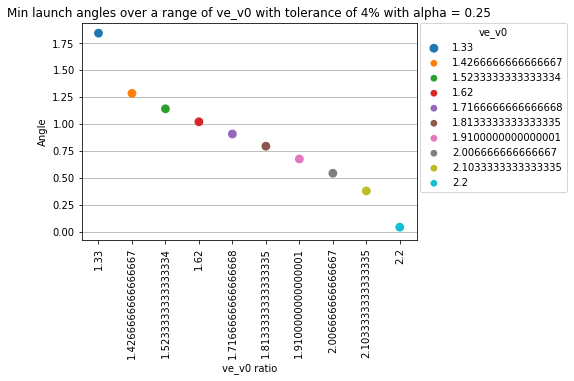

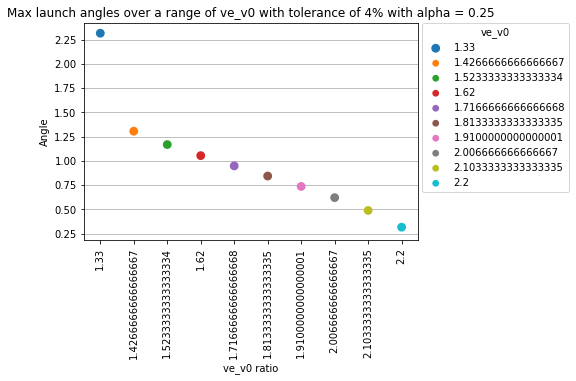

In [20]:
# make a pointplot for the Min angles over a range of alphas
d = sns.pointplot(x="ve_v0", y="Min_Angle", hue ="ve_v0" , data= newerdf2)
d.set_title("Min launch angles over a range of ve_v0 with tolerance of 4% with alpha = 0.25")
d.set_ylabel("Angle")
d.set_xlabel("ve_v0 ratio")
d.set_xticklabels( labels = newerdf2["ve_v0"], rotation = 90)
# place the legend outside the figure/plot
plt.legend(title = 've_v0', bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()


# Make a pointplot for the Max angles over a range of alphas
e = sns.pointplot(x="ve_v0", y="Max_Angle", hue ="ve_v0" , data= newerdf2)
e.set_title("Max launch angles over a range of ve_v0 with tolerance of 4% with alpha = 0.25")
e.set_ylabel("Angle")
e.set_xlabel("ve_v0 ratio")
e.set_xticklabels( labels = newerdf2["ve_v0"], rotation = 90)
# place the legend outside the figure/plot
plt.legend(title = 've_v0',bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

According to the plot, the minimum ve/v0 ratio to achieve an alpha of 0.25 appears to be around ve/v0 = 1.3. This happens when the launch angle is very small (so practically vertical) and also makes sense. A maximum ve/v0 ratio of approximately 2.2 is needed to reach the desired altitude of alpha = 0.25. 

## Conclusion

Python code was utilized in this lab to assist in plotting various graphs and carrying out numerical analysis. After synthesizing the code, **Part B** asked to test the accuracy of the code by comparing its results with those computed by another tool. The code was verified to be accurate as the results from both methods agreed with one another. For **Part C and Part D** various plots were created while keeping specific variables as constants. The first plot kept the velocity ratio constant at 2 and graphed the minimum and maximum allowable launch angles over a range of alpha values. It was found that for smaller alpha values, the launch angle becomes closer to 90 degrees, indicating that a more horizontal and farther from vertical takeoff is required to achieve a lower altitude. This makes intuitive sense. As the alpha becomes larger, the launch angle becomes closer to 0 degrees, indicating that a more vertical launch is required to achieve a higher altitude. The maximum height the rocket can acheive for a ve/v0 ratio = 2 seems to be just above ~ 0.32α or 0.32 of the radius of Earth in altitude. The second set of plots are generated through seaborn code and functions that held the alpha constant at 0.25 and graphed the minimum and maximum launch angles over a range of velocity ratios(ve/v0). It was found that at higher launch angles, the velocity ratio needed to be closer to 1.33 to reach the desired altitude. At very small launch angles which are more horizontal, the velocity ratio needed to be closer to 2.2 in order to reach the desired altitude. The last part of this lab asked to carry out error analysis of the computations. The error in sinφ0 was calculated to be ±0.34 by taking the partial derivatives of the function with respect to alpha and the velocity ratio and multiplying these terms by the individual variable errors. Two Condition Numbers were then computed using equation 7. For an α = 0.25 while holding ve/v0 constant a **CN = 1.4** was calculated. For an ve/v0 = 2 while holding α constant a **CN = 4.0** was calculated. Since these condition numbers were greater than 1, the function is **unstable or ill-conditioned** near a ve/v0 = 2 and α = 0.25, because of this the error will likely magnify drastically throughout the computations.

## References

1) Sharp, M. (2021) University of Calgary Teaching Assistant. Computational Methods for Geophysicists Winter. 2021


2) Karchewski, B (2021) Topic 01 – Error Sources and Quantification – Lecture, University of Calgary https://d2l.ucalgary.ca/d2l/le/content/356381/Home


3) Pictures used in this lab can be found at their url's embedded in the code!